# ML 101

## Evaluation (Classification)

The metrics that you choose to evaluate your machine learning algorithms are very important.

Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how you weight the importance of different characteristics in the results and your ultimate choice of which algorithm to choose.

In this notebook we explored the following performance metrics using [Cross Validarion](https://scikit-learn.org/stable/modules/cross_validation.html) partition:
1. Confusion Matrix
2. Accuracy
3. Precision
4. Recall
5. F1-score
6. MCC
7. ROC curve

![cross_validation](https://media.githubusercontent.com/media/mariolpantunes/ml101/main/figs/cross.png)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Hard Toy Dataset

In [3]:
# import dataset
df = pd.read_csv('https://media.githubusercontent.com/media/mariolpantunes/ml101/main/datasets/toy_dataset_02.csv')
# print the first rows of the dataset
df.head()

,X1,X2,Y
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,1
4,0,4,0


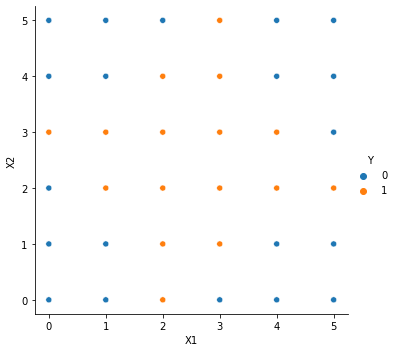

In [4]:
sns.relplot(x="X1", y="X2", hue="Y", data=df);

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

X = df[['X1', 'X2']].to_numpy()
y = df['Y'].to_numpy()

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### Logistic Regression

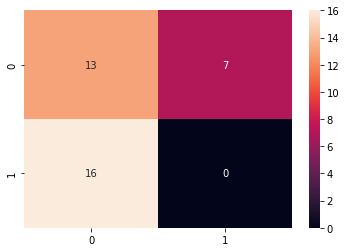

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
y_pred = cross_val_predict(clf, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [7]:
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred)
r = recall_score(y, y_pred)
f = f1_score(y, y_pred)
m = matthews_corrcoef(y, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.3611111111111111
Pre 0.0
Rec 0.0
F1  0.0
MCC -0.43943537440204117


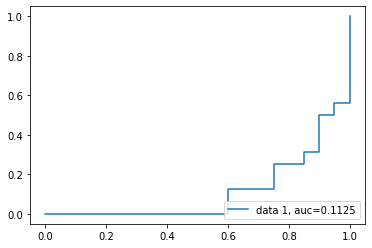

In [8]:
y_pred_proba = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Naive Bayes

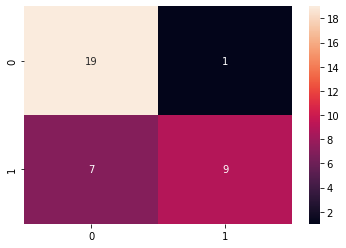

In [9]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
y_pred = cross_val_predict(clf, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [10]:
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred)
r = recall_score(y, y_pred)
f = f1_score(y, y_pred)
m = matthews_corrcoef(y, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.7777777777777778
Pre 0.9
Rec 0.5625
F1  0.6923076923076923
MCC 0.5685677011308599


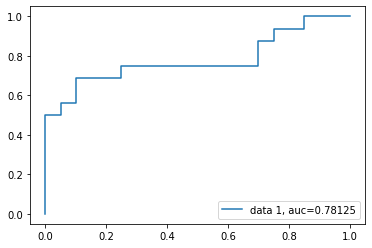

In [11]:
y_pred_proba = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### SVM



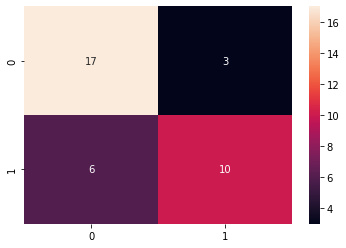

In [12]:
from sklearn.svm import SVC

clf = SVC(probability=True, kernel='rbf')
y_pred = cross_val_predict(clf, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [13]:
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred)
r = recall_score(y, y_pred)
f = f1_score(y, y_pred)
m = matthews_corrcoef(y, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.75
Pre 0.7692307692307693
Rec 0.625
F1  0.6896551724137931
MCC 0.4913975701062781


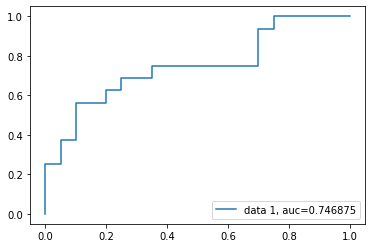

In [14]:
y_pred_proba = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Neural Network

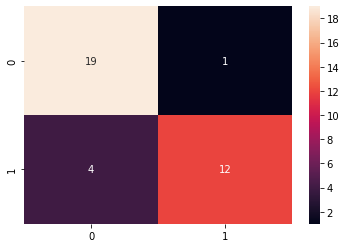

In [15]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=7, max_iter=5000)
y_pred = cross_val_predict(clf, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [16]:
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred)
r = recall_score(y, y_pred)
f = f1_score(y, y_pred)
m = matthews_corrcoef(y, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.8611111111111112
Pre 0.9230769230769231
Rec 0.75
F1  0.8275862068965517
MCC 0.7241648401566204


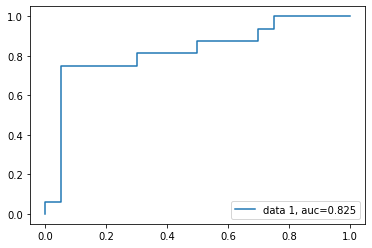

In [17]:
y_pred_proba = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### KNN

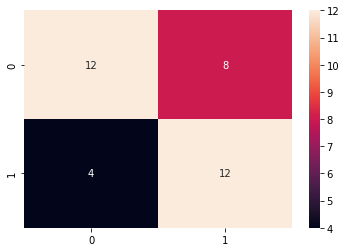

In [18]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7)
y_pred = cross_val_predict(clf, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [19]:
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred)
r = recall_score(y, y_pred)
f = f1_score(y, y_pred)
m = matthews_corrcoef(y, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.6666666666666666
Pre 0.6
Rec 0.75
F1  0.6666666666666665
MCC 0.35


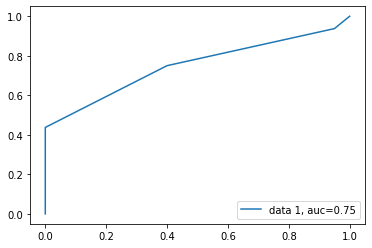

In [20]:
y_pred_proba = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision Trees

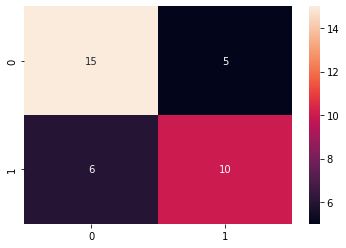

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
y_pred = cross_val_predict(clf, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [22]:
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred)
r = recall_score(y, y_pred)
f = f1_score(y, y_pred)
m = matthews_corrcoef(y, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.6944444444444444
Pre 0.6666666666666666
Rec 0.625
F1  0.6451612903225806
MCC 0.37796447300922725


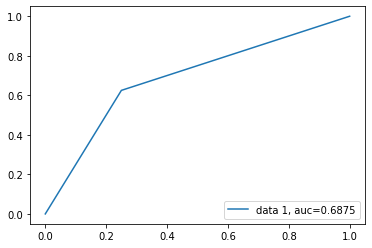

In [23]:
y_pred_proba = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random Forest

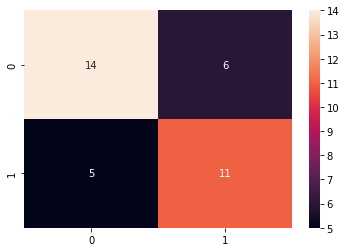

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
y_pred = cross_val_predict(clf, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [25]:
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred)
r = recall_score(y, y_pred)
f = f1_score(y, y_pred)
m = matthews_corrcoef(y, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.6944444444444444
Pre 0.6470588235294118
Rec 0.6875
F1  0.6666666666666667
MCC 0.3856962663899156


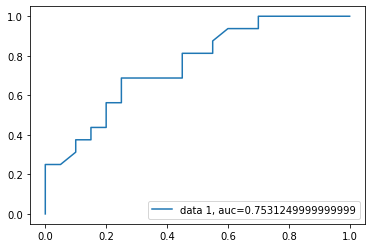

In [26]:
y_pred_proba = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Gradient Boosting

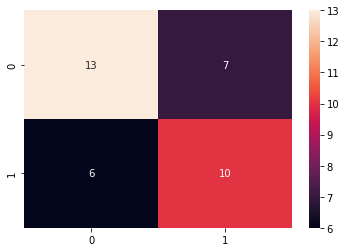

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
y_pred = cross_val_predict(clf, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [28]:
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred)
r = recall_score(y, y_pred)
f = f1_score(y, y_pred)
m = matthews_corrcoef(y, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.6388888888888888
Pre 0.5882352941176471
Rec 0.625
F1  0.6060606060606061
MCC 0.2737199309863917


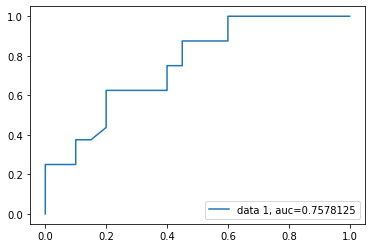

In [29]:
y_pred_proba = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Voting Ensemble

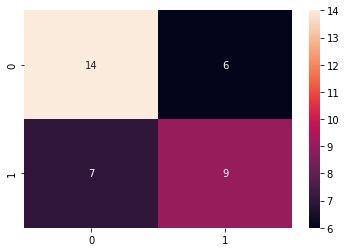

In [30]:
from sklearn.ensemble import VotingClassifier

#c1 = LogisticRegression()
c2 = GaussianNB()
c3 = SVC(probability=True, kernel='rbf')
c4 = MLPClassifier(random_state=7, max_iter=5000)
c5 = KNeighborsClassifier(n_neighbors=7)
c6 = DecisionTreeClassifier()
c7 = RandomForestClassifier(random_state=42)
c8 = GradientBoostingClassifier(random_state=42)

clfs = [('nb', c2), ('svm', c3), ('nn', c4),
        ('knn', c5), ('dt', c6), ('rf', c7), ('gbc', c8)]

clf = VotingClassifier(clfs, voting='soft')
y_pred = cross_val_predict(clf, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [31]:
a = accuracy_score(y, y_pred)
p = precision_score(y, y_pred)
r = recall_score(y, y_pred)
f = f1_score(y, y_pred)
m = matthews_corrcoef(y, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.6388888888888888
Pre 0.6
Rec 0.5625
F1  0.5806451612903225
MCC 0.2645751311064591


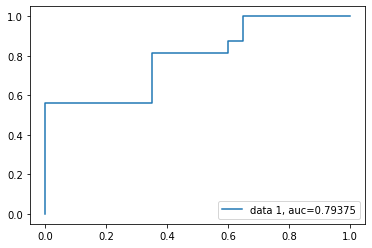

In [32]:
y_pred_proba = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## McNemar test

In [41]:
clf = SVC(probability=True, kernel='rbf')
y_pred_svm = cross_val_predict(clf, X, y, cv=skf)
m1 = matthews_corrcoef(y, y_pred_svm)
print(f'MCC SVM {m1}')


clf = MLPClassifier(random_state=7, max_iter=5000)
y_pred_nn = cross_val_predict(clf, X, y, cv=skf)
m2 = matthews_corrcoef(y, y_pred_nn)
print(f'MCC ANN {m2}')

clf = LogisticRegression()
y_pred_lr = cross_val_predict(clf, X, y, cv=skf)
m3 = matthews_corrcoef(y, y_pred_lr)
print(f'MCC LR {m3}')

MCC SVM 0.6719840027857806
MCC ANN 0.6625413488689132
MCC LR -0.5163977794943223


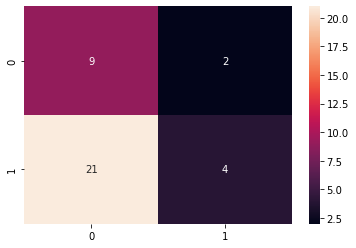

In [42]:
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

tb = mcnemar_table(y_target=y, y_model1=y_pred_nn, y_model2=y_pred_lr)
sns.heatmap(tb, annot=True)

In [45]:
chi2, p = mcnemar(ary=tb, exact=True)
print('chi-squared:', chi2)
print('p-value:', p)

alpha = 0.001

if p < alpha:
  print('The models are significantly different')
else:
  print('The models are similar')

chi-squared: 2
p-value: 6.604194641113283e-05
The models are significantly different
